In [ ]:
Delivery_time -> predict delivery time using sorting time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data  = pd.read_csv('delivery_time.csv')

In [3]:
# backup original data
df = data.copy()

# Data Exploration

In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.info

<bound method DataFrame.info of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [6]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Data Preprocessing

# Identifying Duplicates

In [8]:
duplicated_rows = df[df.duplicated()]

print(duplicated_rows)

Empty DataFrame
Columns: [Delivery Time, Sorting Time]
Index: []


In [9]:
# There is no duplicate values present in dataset.

# Identifying Missing Values

In [10]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [11]:
# There is no missing values in dataset

# Identifying Outliers

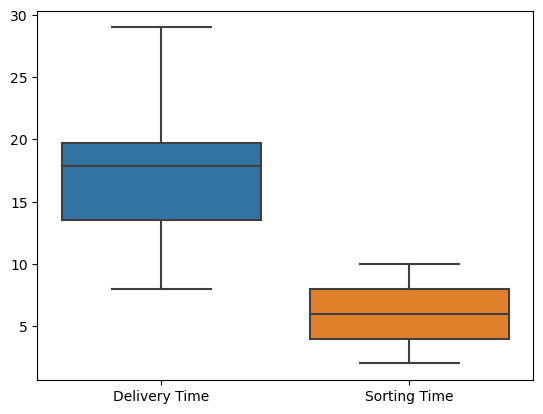

In [12]:
sns.boxplot(data=df);

# Data Visualization

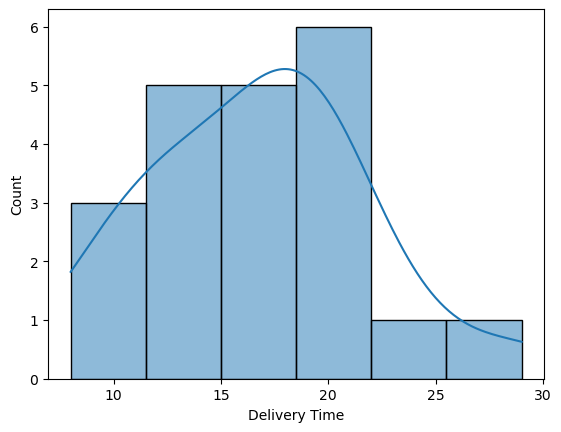

In [13]:
sns.histplot(df['Delivery Time'],kde=True)
plt.show()

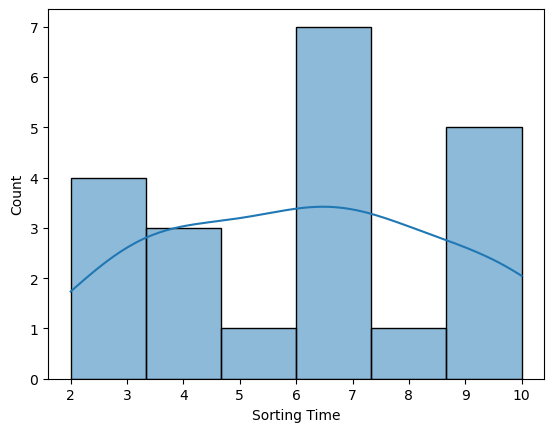

In [15]:
sns.histplot(data['Sorting Time'],kde=True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


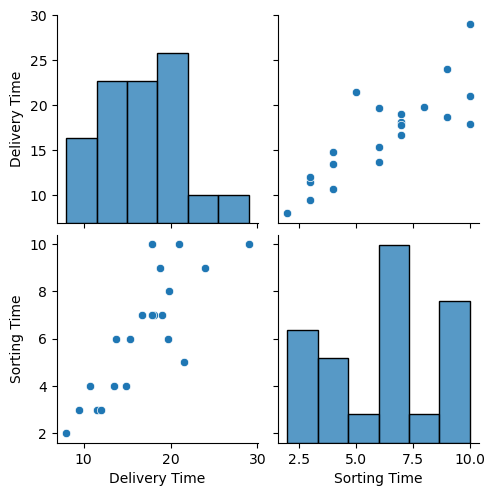

In [16]:
sns.pairplot(df);

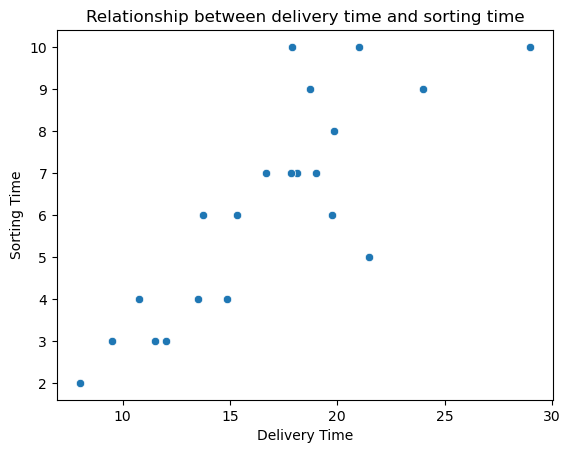

In [11]:
sns.scatterplot(x=data['Delivery Time'], y=data['Sorting Time'], data=data)
plt.title("Relationship between delivery time and sorting time")
plt.show()

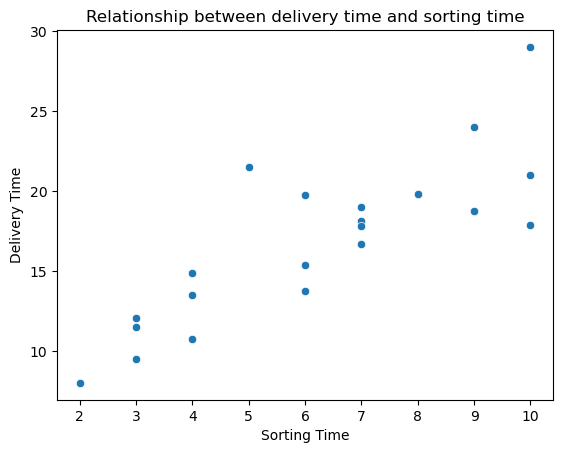

In [17]:
sns.scatterplot(x=df['Sorting Time'], y=df['Delivery Time'], data=df)
plt.title("Relationship between delivery time and sorting time")
plt.show()

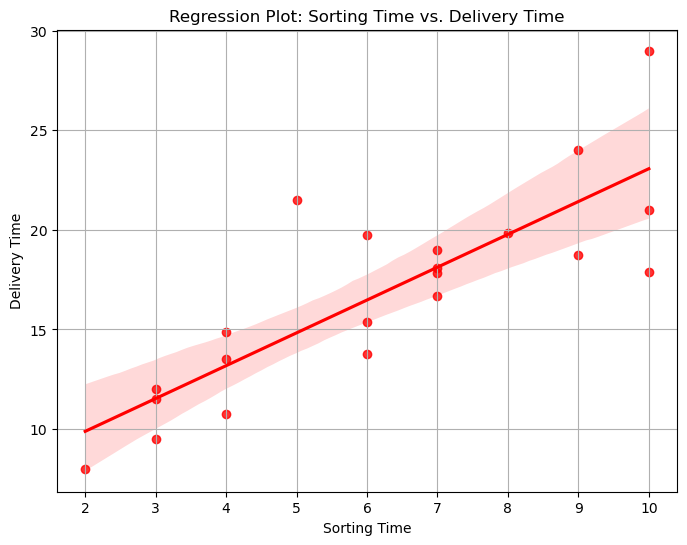

In [18]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Sorting Time', y='Delivery Time', color='red')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title("Regression Plot: Sorting Time vs. Delivery Time")
plt.grid()
plt.show()

In [19]:
correlation_matrix = df.corr()
print('Correlation :',correlation_matrix)

Correlation :                Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000


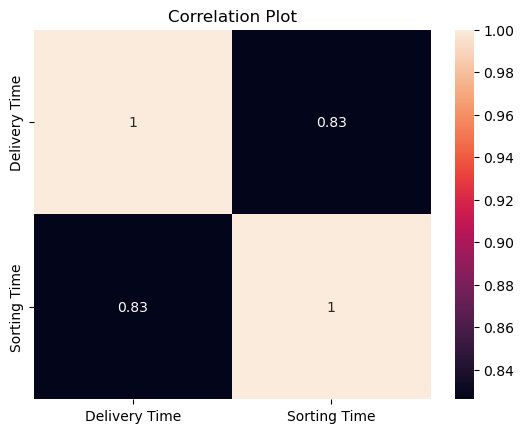

In [20]:
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Plot")
plt.show()

# Splitting Data

In [26]:
from sklearn.model_selection import train_test_split

# Prepare the data for linear regression
X = df['Sorting Time']
y = df['Delivery Time']

# Reshaping array from 1d to 2d
X = X.values.reshape(-1,1)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

In [28]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the salary for the testing data
y_pred = model.predict(X_test)
print(y_test, y_pred)

0     21.00
17    18.11
15    14.88
1     13.50
8     17.90
Name: Delivery Time, dtype: float64 [24.9247435  18.85200984 12.77927618 12.77927618 24.9247435 ]


# Model Evaluation

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE = ',mean_absolute_error(y_test, y_pred))
print('MSE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ',mean_squared_error(y_test, y_pred, squared=False))
print('R2_error = ',r2_score(y_test, y_pred))

MAE =  2.9025888966971176
MSE =  14.046738956635016
RMSE =  3.7478979383962705
R2_error =  -1.0207599586367362


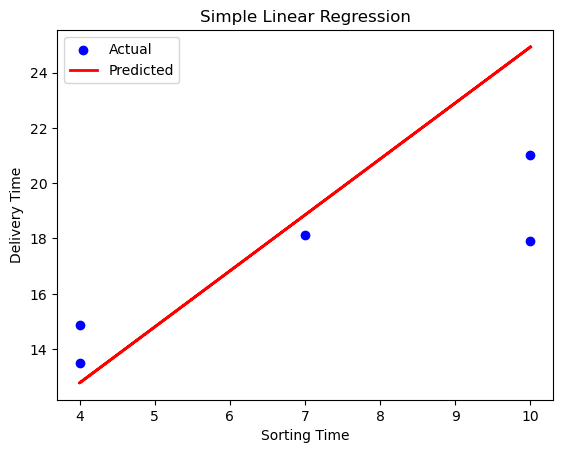

In [30]:
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.legend()
plt.title("Simple Linear Regression")
plt.show()

# Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
polynomial_convertor = PolynomialFeatures(degree=2, include_bias=False)

In [33]:
polynomial_convertor.fit(X)

PolynomialFeatures(include_bias=False)

In [34]:
poly_features = polynomial_convertor.transform(X)

In [35]:
poly_features.shape

(21, 2)

In [36]:
poly_features[0]

array([ 10., 100.])

In [37]:
polynomial_convertor.fit_transform(X)

array([[ 10., 100.],
       [  4.,  16.],
       [  6.,  36.],
       [  9.,  81.],
       [ 10., 100.],
       [  6.,  36.],
       [  7.,  49.],
       [  3.,   9.],
       [ 10., 100.],
       [  9.,  81.],
       [  8.,  64.],
       [  4.,  16.],
       [  7.,  49.],
       [  3.,   9.],
       [  3.,   9.],
       [  4.,  16.],
       [  6.,  36.],
       [  7.,  49.],
       [  2.,   4.],
       [  7.,  49.],
       [  5.,  25.]])

In [38]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [39]:
poly_model = LinearRegression()

In [40]:
poly_model.fit(X_train, y_train)

LinearRegression()

In [41]:
test_predictions = poly_model.predict(X_test)

In [42]:
# Calculate evaluation metrics
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

print('MAE = ', MAE)
print('MSE = ', MSE)
print('RMSE = ', RMSE)

MAE =  2.6504285783826247
MSE =  11.984070310741796
RMSE =  3.4618015989859665


In [43]:
train_rmse_error = []
test_rmse_error = []

for d in range(1,10):
    
    poly_convertor = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_convertor.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train,y_train)
    
    train_pred = poly_model.predict(X_train)
    test_pred = poly_model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

In [44]:
train_rmse_error

[2.7770666832487807,
 2.7740014211319646,
 2.2384893699768895,
 2.109049239029645,
 2.0114966755313968,
 1.6837870694780377,
 1.6482266805499546,
 1.6482266805498034,
 1.648226680551356]

In [45]:
test_rmse_error

[3.351678551561038,
 3.4618015989859665,
 5.226181459667047,
 5.722833019881087,
 5.678847281440267,
 7.655778319531954,
 9.409802082657384,
 8.545527232645409,
 7.800929494066843]

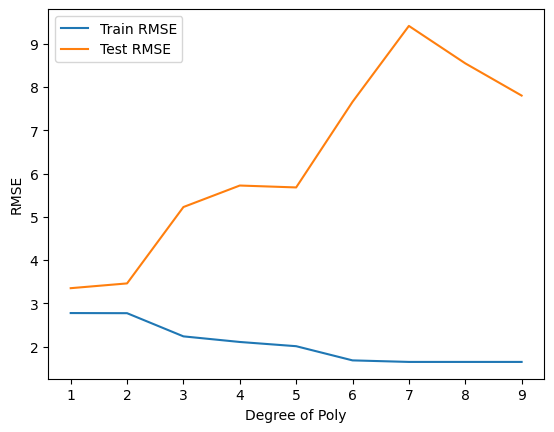

In [46]:
plt.plot(range(1,10),train_rmse_error, label='Train RMSE')

plt.plot(range(1,10),test_rmse_error, label='Test RMSE')

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend();

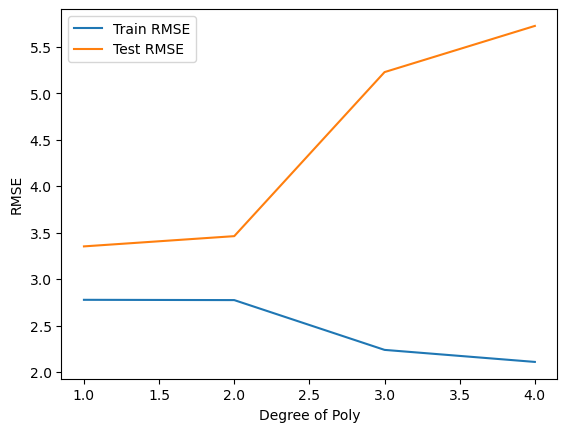

In [47]:
plt.plot(range(1,5),train_rmse_error[:4], label='Train RMSE')

plt.plot(range(1,5),test_rmse_error[:4], label='Test RMSE')

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend();

In [48]:
final_poly_convertor = PolynomialFeatures(degree=2, include_bias=False)

In [49]:
final_model = LinearRegression()

In [50]:
full_converted_X = final_poly_convertor.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

# Model Deployment

In [51]:
# from joblib import dump,load

# dump(final_model, 'final_poly_model.joblib')